In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
y = dataset['Exited']

In [6]:
X = dataset[[ 'CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [7]:
Gender = pd.get_dummies(dataset['Gender'],drop_first=True)

In [8]:
Geography = pd.get_dummies(dataset['Geography'],drop_first=True)

In [9]:
pd.concat([X,Gender,Geography],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [10]:
X = pd.concat([X,Gender,Geography],axis=1)

In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,train_size=0.80,random_state=42)

In [14]:
X_train.shape

(8000, 11)

In [15]:
X_test.shape

(2000, 11)

In [16]:
y_train.shape

(8000,)

In [17]:
y_test.shape

(2000,)

In [18]:
from keras.models import Sequential

In [19]:
model = Sequential()

In [20]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [21]:
from keras.layers import Dense

In [22]:
model.add(Dense(units=8,activation="relu",input_dim=11))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(Dense(units=6,activation="relu"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(Dense(units=6,activation="relu"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(Dense(units=1,activation="sigmoid"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 6,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initiali

In [31]:
from keras.optimizers import Adam

In [32]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.000001))

In [33]:
model.get_weights()

[array([[-0.30536205,  0.34906554, -0.49463418,  0.03691757, -0.5021433 ,
         -0.37654543, -0.11152306,  0.32778555],
        [ 0.35260648, -0.49160317, -0.0565607 , -0.48701423, -0.25016147,
          0.11611104, -0.16813657, -0.3956011 ],
        [-0.01488823,  0.2857985 , -0.3391828 , -0.20873952,  0.51672083,
          0.5611232 ,  0.21926188,  0.14160526],
        [ 0.23942232,  0.06542122,  0.5391337 ,  0.06981868,  0.1310435 ,
         -0.33095255,  0.13240445, -0.27732745],
        [ 0.29478514, -0.3388726 ,  0.1831916 ,  0.3122427 ,  0.2709779 ,
         -0.5194531 ,  0.5003734 , -0.54417264],
        [ 0.36849874,  0.5335793 ,  0.4827749 ,  0.31611216, -0.22544771,
          0.04743659,  0.06645447,  0.5588812 ],
        [ 0.28393698,  0.5389578 , -0.16012138,  0.29403567, -0.02267188,
         -0.03407359, -0.2603738 , -0.1207926 ],
        [ 0.48049754,  0.15174884, -0.262898  , -0.42702577, -0.3322712 ,
         -0.18528825, -0.24485856,  0.46076006],
        [ 0.1518

In [38]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 8148.8457
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 8109.3599
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 8069.9321
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 8030.5283
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 7991.0601
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 7951.5732
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 7912.0610
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 7872.5405
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 7833.0757
Epoch 10/200
250/250 [==============================] - 1s 2ms/step - loss: 7793.6509
Epoch 11/200
250/250 [==============================] - 1s 2ms/step - loss: 7754.2007
Epoch 12/200
250/250 [==============================] - 1s 2ms/

250/250 [==============================] - 1s 2ms/step - loss: 5043.7773
Epoch 97/200
250/250 [==============================] - 0s 1ms/step - loss: 5017.8867
Epoch 98/200
250/250 [==============================] - 0s 2ms/step - loss: 4992.5044
Epoch 99/200
250/250 [==============================] - 0s 2ms/step - loss: 4967.4380
Epoch 100/200
250/250 [==============================] - 0s 2ms/step - loss: 4942.5532
Epoch 101/200
250/250 [==============================] - 0s 2ms/step - loss: 4917.8096
Epoch 102/200
250/250 [==============================] - 1s 2ms/step - loss: 4893.1587
Epoch 103/200
250/250 [==============================] - 1s 2ms/step - loss: 4868.5957
Epoch 104/200
250/250 [==============================] - 1s 2ms/step - loss: 4844.1606
Epoch 105/200
250/250 [==============================] - 0s 1ms/step - loss: 4819.8818
Epoch 106/200
250/250 [==============================] - 0s 2ms/step - loss: 4795.8301
Epoch 107/200
250/250 [==============================] - 0s 

250/250 [==============================] - 1s 2ms/step - loss: 3122.3887
Epoch 191/200
250/250 [==============================] - 0s 2ms/step - loss: 3106.7717
Epoch 192/200
250/250 [==============================] - 0s 2ms/step - loss: 3092.5049
Epoch 193/200
250/250 [==============================] - 0s 2ms/step - loss: 3078.5425
Epoch 194/200
250/250 [==============================] - 0s 2ms/step - loss: 3064.6489
Epoch 195/200
250/250 [==============================] - 1s 2ms/step - loss: 3050.7754
Epoch 196/200
250/250 [==============================] - 0s 2ms/step - loss: 3036.9204
Epoch 197/200
250/250 [==============================] - 0s 2ms/step - loss: 3023.1118
Epoch 198/200
250/250 [==============================] - 1s 2ms/step - loss: 3009.2981
Epoch 199/200
250/250 [==============================] - 0s 2ms/step - loss: 2995.5247
Epoch 200/200
250/250 [==============================] - 0s 2ms/step - loss: 2981.7957


In [39]:
model.history.history

{'loss': [8148.845703125,
  8109.35986328125,
  8069.93212890625,
  8030.5283203125,
  7991.06005859375,
  7951.5732421875,
  7912.06103515625,
  7872.54052734375,
  7833.07568359375,
  7793.65087890625,
  7754.20068359375,
  7714.8603515625,
  7675.66162109375,
  7636.5810546875,
  7597.5791015625,
  7558.544921875,
  7519.49365234375,
  7480.52001953125,
  7441.625,
  7402.79736328125,
  7364.01806640625,
  7325.20751953125,
  7286.462890625,
  7247.9033203125,
  7209.865234375,
  7172.49462890625,
  7135.701171875,
  7099.29248046875,
  7063.4033203125,
  7027.9091796875,
  6992.6474609375,
  6957.591796875,
  6922.96337890625,
  6888.783203125,
  6854.9423828125,
  6821.29150390625,
  6787.78076171875,
  6754.4013671875,
  6721.20458984375,
  6688.0908203125,
  6655.150390625,
  6622.43359375,
  6589.8857421875,
  6557.4560546875,
  6525.10595703125,
  6492.79345703125,
  6460.57373046875,
  6428.51416015625,
  6396.5869140625,
  6364.7275390625,
  6332.99853515625,
  6301.43701171

In [40]:
l=pd.DataFrame(model.history.history)

<AxesSubplot:>

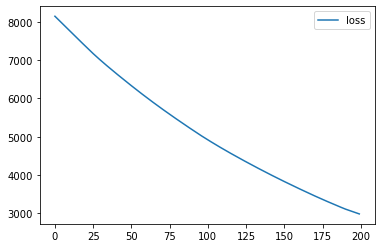

In [41]:
import matplotlib
l.plot()